# Data Analysis

In this interactive notebook, we perform analysis on the data that we merged in the [previous notebook](data-merging.ipynb). Here, we aim to perform some analysis on the merged and cleaned data, producing some visualizations and important statistical information to help us answer some of the questions outlined in the [ReadMe](README.md).

----

Let's start by importing the required libraries. Note that custom functions are stored in the file [`analytics_tools.py`](analytics_tools.py), which we will need to import.

In [2]:
import pandas as pd

In [3]:
tn_movie_budgets = pd.read_pickle('cleaned_data/tn_movie_budgets.pkl')
imdb_title_basics = pd.read_pickle('cleaned_data/imdb_title_basics.pkl')

In [4]:
tn_movie_budgets.head(10)

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
8,2017-11-17,Justice League,300000000,229024295,655945209
9,2015-11-06,Spectre,300000000,200074175,879620923
10,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099
11,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347


In [5]:
imdb_title_basics.head(10)

,imdb_id,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"[Action,Crime,Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography,Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"[Comedy,Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"[Comedy,Drama,Fantasy]"
5,tt0111414,A Thin Life,A Thin Life,2018,[Comedy]
6,tt0112502,Bigfoot,Bigfoot,2017,"[Horror,Thriller]"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,"[Adventure,Animation,Comedy]"
8,tt0139613,O Silêncio,O Silêncio,2012,"[Documentary,History]"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,[Biography]


In [6]:
merged_df = imdb_title_basics.join(tn_movie_budgets.set_index('primary_title'), on='primary_title', how='left')

In [7]:
merged_df.dropna(inplace=True)

In [8]:
merged_df.drop_duplicates(subset='original_title', inplace=True)

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1783 entries, 20 to 139537
Data columns (total 9 columns):
imdb_id              1783 non-null object
primary_title        1783 non-null object
original_title       1783 non-null object
start_year           1783 non-null int64
genres               1783 non-null object
release_date         1783 non-null datetime64[ns]
production_budget    1783 non-null float64
domestic_gross       1783 non-null float64
worldwide_gross      1783 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 139.3+ KB


In [10]:
merged_df.head(10)

,imdb_id,primary_title,original_title,start_year,genres,release_date,production_budget,domestic_gross,worldwide_gross
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action,Animation,Comedy]",2012-12-31,45000000.0,0.0,7.370600e+04
48,tt0337692,On the Road,On the Road,2012,"[Adventure,Drama,Romance]",2013-03-22,25000000.0,720828.0,9.313302e+06
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure,Comedy,Drama]",2013-12-25,91000000.0,58236838.0,1.878612e+08
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action,Crime,Drama]",2014-09-19,28000000.0,26017685.0,6.210859e+07
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action,Adventure,Sci-Fi]",2015-06-12,215000000.0,652270625.0,1.648855e+09
62,tt0376136,The Rum Diary,The Rum Diary,2011,"[Comedy,Drama]",2011-10-28,45000000.0,13109815.0,2.154473e+07
67,tt0383010,The Three Stooges,The Three Stooges,2012,"[Comedy,Family]",2012-04-13,30000000.0,44338224.0,5.405225e+07
69,tt0393049,Anderson's Cross,Anderson's Cross,2010,"[Comedy,Drama,Romance]",2010-12-31,300000.0,0.0,0.000000e+00
71,tt0398286,Tangled,Tangled,2010,"[Adventure,Animation,Comedy]",2010-11-24,260000000.0,200821936.0,5.864772e+08
73,tt0401729,John Carter,John Carter,2012,"[Action,Adventure,Sci-Fi]",2012-03-09,275000000.0,73058679.0,2.827781e+08


----
Cleaned and merged! Let's do some analysis.

----

In [11]:
import seaborn as sns

In [12]:
sns.set()

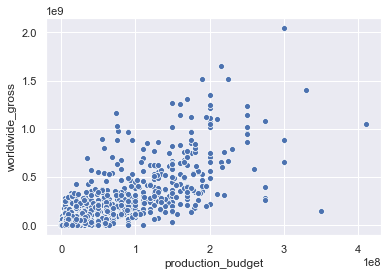

In [16]:
sns.scatterplot(x='production_budget', y='worldwide_gross', data=merged_df)

Somehow, we need to best make use of our genre descriptors. We currently have lists of strings, and it would be nice to produce some sort of histogram using this information.